# Project: Medical Company Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A physician’s office wants to gain a better understanding of their patients and their probabilty of a no show appointment. The dataset shows the data associated with the medical office and details the clients information and whether or not they were a no show or not. 

# Question
What measures can be taken to reduce the number of no-show patients?

# Understand
<br>The office would like the know the following: <br>
<br>1. What percentage of patients are a no show?
<br>2. Are text message reminders an effective way to reduce the amount of no shows?
<br>3. Which age group has the most amount of no shows?<br>

<br>By learning patient habits in regard to appointments and no shows, the physicians office is able to more effectively target their customers to decrease no shows which would increase revenue.

# Exploration

## Data Wrangling

> Before we get into the analysis portion of this project, we're going to first assess the data to dertmine if there is any cleaning that needs to be performed.

### Initial Exploration

In [43]:
#Importing appropriate packes 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#The dataset was obtained from: 
medical_original = pd.read_csv('noshowappointments.csv')

In [44]:
#Making a copy of the dataset so that way the main dataset remains unchanged of access is needed again.
medical = medical_original.copy()

In [3]:
medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [45]:
medical[['Age', 'Scholarship','Hipertension', 'Diabetes', 'Alcoholism','Handcap','SMS_received' ]].describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


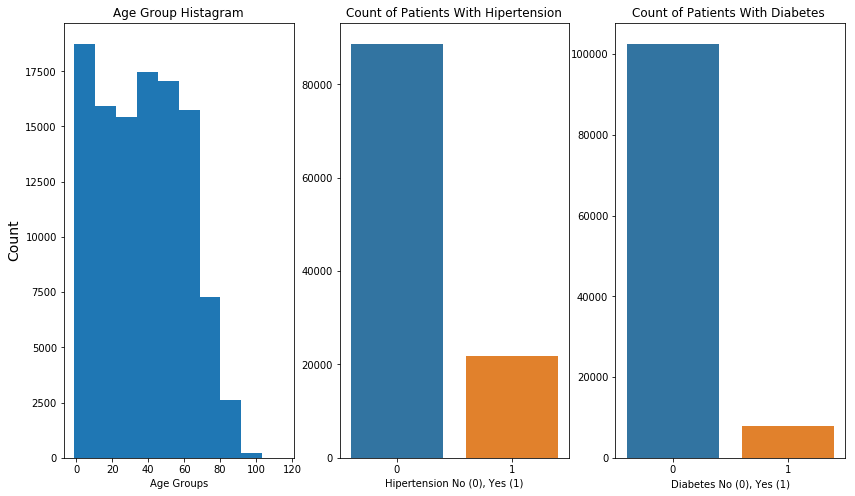

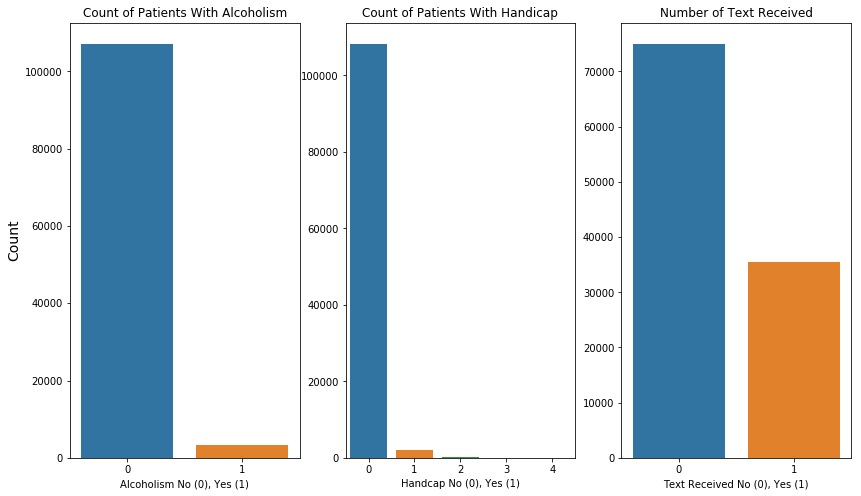

In [54]:
#Histograms of each main category.
plt.figure(figsize = [14,8])

plt.subplot(1,3,1)
plt.hist(medical['Age'])
plt.title('Age Group Histagram')
plt.xlabel('Age Groups')
plt.ylabel('Count', fontsize = 14)

#Plot 2
plt.subplot(1,3,2)
sb.countplot(x='Hipertension', data = medical)
plt.title('Count of Patients With Hipertension')
plt.xlabel('Hipertension No (0), Yes (1)')
plt.ylabel('')

#Plot 3
plt.subplot(1,3,3)
sb.countplot(x='Diabetes', data = medical)
plt.title('Count of Patients With Diabetes ')
plt.xlabel('Diabetes No (0), Yes (1)')
plt.ylabel('')

#SECOND GRAPH
plt.figure(figsize = [14,8])

#Plot 1
plt.subplot(1,3,1)
sb.countplot(x='Alcoholism', data = medical)
plt.title('Count of Patients With Alcoholism')
plt.xlabel('Alcoholism No (0), Yes (1)')
plt.ylabel('Count', fontsize = 14)

#Plot 2
plt.subplot(1,3,2)
sb.countplot(x='Handcap', data = medical)
plt.title('Count of Patients With Handicap')
plt.xlabel('Handcap No (0), Yes (1)')
plt.ylabel('')
#Plot 3
plt.subplot(1,3,3)
sb.countplot(x='SMS_received', data = medical)
plt.title('Number of Text Received')
plt.xlabel('Text Received No (0), Yes (1)')
plt.ylabel('');


### DATA CLEANING ISSUES

A.	Quality

    a.	Patient ID showing as float
    b.	Appointment ID showing as int
    c.	Scheduled day and appointment showing as object instead of date
    d.	Handicap, Hupertension are spelt incorrectly 
    e.	Split time from schedule day
    f.	Noticed that there are actually duplicates in the data
        
B.	Tidiness<br>
    
    a.	Remove z from the end of scheduled day and appointment day
    b.	Change sms_recieved to yes and no

D.	Validity<br>

    a.	Age showing -1, check to verify
        i.	Patient is showing as F, will assume that baby is unborn patient
    b.	Handicap is showing a max of 4 instead of 1
        i.	Upon review, handicap column shows muplipe tows with number greater than 1. Will make the assumption that these numbers are supposed to indicate 1 instead of their representative values
        ii.	Changed all ints greater than 1 to 1
    c.	Max age showing 115
        i.	While this is abnormal, it is a possible range of age group for individuals, 

Data Check<br>

    i. Verified that Scholarship, hypertension, diabaest, alcoholism, and sms are a max of 1
    ii. All counts are equal
    iii. Verifited count total matched total counts 
        (110527, 14)
    iv. Verified there are no null values
    v. Verfied there are no duplicates 


### DESCRIBE
#### Changing Datatypes to appropraite names and correcting spelling mistakes in headers

In this next section, we will address and change the data types to reflect accurate data types as well as correcting a misspellings in the title data.

### CODE

In [32]:
#Changing PatientID and AppointmentID to an object rather than as a numeric type

medical[['PatientId', 'AppointmentID']] = medical[['PatientId', 'AppointmentID']].astype('object')

#Changing ScheduledDay and AppointmentDay to date type

medical[['ScheduledDay', 'AppointmentDay']] = medical[['ScheduledDay', 'AppointmentDay']].astype('datetime64')

# Correcting the spelling of titles
medical = medical.rename(index = str, columns = {'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap'})



### TEST

In [33]:
#Verifying changes
medical.dtypes

PatientId                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                   object
dtype: object

### DESCRIBE
#### Adjusting the numbers to 1 for Handicap
> It was noted that there are several handicap rows that have numbers greater than 1. I'm going to assume that these are supposed to be 1 and not anything else. I adjusted the rows to change anything greater than 1 to 1.

### CODE

In [34]:
medical['Handicap'] = medical['Handicap'].replace([2,3,4], 1)

### TEST

In [35]:
medical['Handicap'].value_counts()

0    108286
1      2241
Name: Handicap, dtype: int64

### DEFINE
#### Adding Age Groups to the Table
>For better analysis purposes, I've added age group bins. This will allow for an easy overview of which groups have a higher rate of no shows.

### CODE

In [36]:
#Added bins to create categories for each age group
#It was noticed that there was a -1 age which is assumed to be a pregnant woman which is why the bin starts
#at number 1
bins = [-1, 13, 18, 35, 55, 115]
group_names = ['Infant', 'Teenager', 'Young Adult', 'Adult', 'Elder Adult']
medical['Groups'] = pd.cut(medical['Age'], bins, labels = group_names)



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Groups
0,2.98725e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Elder Adult
1,5.58998e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Elder Adult
2,4.26296e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Elder Adult
3,8.67951e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Infant
4,8.84119e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Elder Adult


### TEST

In [40]:
#Verify changes are effective
print(medical.info())

medical['Age'].groupby(medical['Groups']).describe()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
Groups            110526 non-null category
dtypes: category(1), datetime64[ns](2), int64(7), object(5)
memory usage: 17.8+ MB
None


,count,mean,std,min,25%,50%,75%,max
Groups,,,,,,,,
Infant,22139.0,5.369348,4.168631,0.0,1.0,5.0,9.0,13.0
Teenager,6727.0,16.154006,1.389205,14.0,15.0,16.0,17.0,18.0
Young Adult,24137.0,27.077392,4.962661,19.0,23.0,27.0,31.0,35.0
Adult,30019.0,45.615677,5.843961,36.0,40.0,46.0,51.0,55.0
Elder Adult,27504.0,67.222186,8.968875,56.0,60.0,65.0,73.0,115.0


# SOLVE

<a id='eda'></a>
## Exploratory Data Analysis
The general goal of the report is to determine the most common reasons for no show appointments and any ways to reduce the number. The analysis will take a look at three factors: The use of text message reminders, no shows for various age groups, and no shows percentages for gender types. 

Through this analysis, healthcare group will be able to effecietlvy create a marketing strategy to reduce the number of no shows.

### Research Question 1 (Are text message reminders effective?)
>The first thing that we will take a look at is the effectivness of text messages. We will explore the relationship between sending out a text message and the number of people who do not show up for their appointment. A general hypothesis is that by sending a text message reminder, it will reduce the number of no show appointments. 

In [7]:
# Since I'm going to be working with only certain columns, I'm dropping the unncessesary columns
research = medical.drop(columns = ['Neighbourhood','Hypertension','Diabetes','Alcoholism' ,'Handicap','ScheduledDay','AppointmentDay','Scholarship' ,'AppointmentID'])
research.head()

,PatientId,Gender,Age,SMS_received,No-show,Groups
0,2.98725e+13,F,62,0,No,Elder Adult
1,5.58998e+14,M,56,0,No,Elder Adult
2,4.26296e+12,F,62,0,No,Elder Adult
3,8.67951e+11,F,8,0,No,Infant
4,8.84119e+12,F,56,0,No,Elder Adult


I'm going to next pull up the data for analysis. Intitially I'm going to pull the numbers to see the number of patients who were a no show vs those who showed up for their appointment.

In [8]:
#In this section, we will seperate the number of no shows into those who showed up for their appointment and those who were a no show
no_shows = research[research[('No-show')] == 'Yes']
showed = research[research[('No-show')] == 'No']

print("There number of patients who did not show up for their appointment is:", len(no_shows))
print('The number of patients who showed up for their appointment is:', len(showed))
print('The percentage of patients who did not show up for their appointment is:',  round((len(no_shows) / len(showed)) * 100),'%')
print('The percentage of patients who showed up for their appointment is:',  round((1 - len(no_shows) / len(showed)) * 100),'%')

There number of patients who did not show up for their appointment is: 22319
The number of patients who showed up for their appointment is: 88208
The percentage of patients who did not show up for their appointment is: 25 %
The percentage of patients who showed up for their appointment is: 75 %


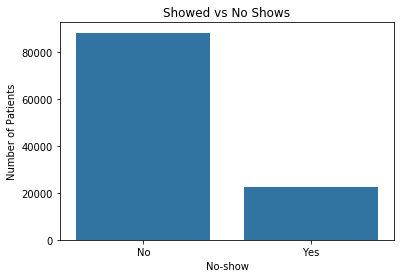

In [9]:
base_color = sb.color_palette()[0]
sb.countplot(data = research, x = 'No-show', color = base_color)
plt.title('Showed vs No Shows')
plt.ylabel('Number of Patients');

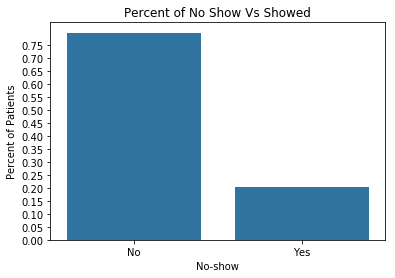

In [10]:
r1 = research.shape[0]
maxr = research['No-show'].value_counts().max()
max_prop = maxr / r1
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = research, x = 'No-show', color = base_color)
plt.yticks(tick_props * r1, tick_names)
plt.ylabel('Percent of Patients')
plt.title('Percent of No Show Vs Showed');

### Quick Analysis

From first glance, it appears that there is a high percentage of individuals who are a no show for their appointments. On average, 1/4 patients are a no show. 

## Analysis of Text Message Effectivness

I'm going to first explore the data for patients who did not show up for their appointments. I'm going to split the two groups into a total of four seperate data sets. 
>1. Patients who did not show up for their appointment and did not receive a text
>2. Patients who did not show up for their appointment and did receive a text
>3. Patients who showed up for their appoitnment and did not receive a text
>4. Patients who showed up for their appointment and did receive a text

By measuring the data received from these groups, it will be beneficial to be able to see if text messages are an effecitve means at reducing the number of no show appointments

### No Show Appointments
In this section we will explore the relationship between no show appointments and text messages. With this initial data, we will be able to establish a basis for further analysis.

In [11]:
#Breaking up no shows in to whether or no they received a text message
no_show_no_text = no_shows[no_shows['SMS_received'] == 0]
no_show_with_text = no_shows[no_shows['SMS_received'] == 1]

#Finding total length of no shows
total_no_shows = len(no_shows)
#Determining the length of those who did not receive a text 
no_show_no_text_length = len(no_show_no_text)
# those who received a text
no_show_with_text_length = len(no_show_with_text)

#Calculating the percentage of no shows who did not receive a text
no_show_no_text_percent = round((no_show_no_text_length / total_no_shows)*100)

#Calulcating the percentage of no shows who did receive a text
no_show_with_text_percent = round((no_show_with_text_length / total_no_shows)*100)


print ('Number of No Shows With No Text:', no_show_no_text_length)
print ('Number of No Shows With With Text:', no_show_with_text_length)
print ('Percentage of No Shows With No Text Reminder:',no_show_no_text_percent,'%')
print ('Percentage of No Shows With With Text Reminder:',no_show_with_text_percent,'%')


Number of No Shows With No Text: 12535
Number of No Shows With With Text: 9784
Percentage of No Shows With No Text Reminder: 56 %
Percentage of No Shows With With Text Reminder: 44 %


This next graph shows the number of no show appointments for those who received a text versus those who did not receive a text. 

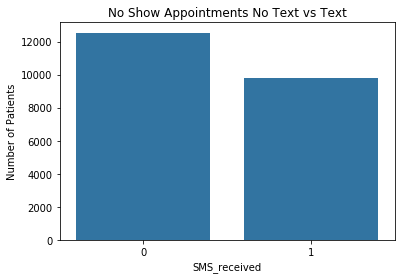

In [12]:
sb.countplot(data = no_shows, x = 'SMS_received', color = base_color)
plt.ylabel('Number of Patients')
plt.title('No Show Appointments No Text vs Text');


The following graph shows the pecentage of no show patients who received a text.

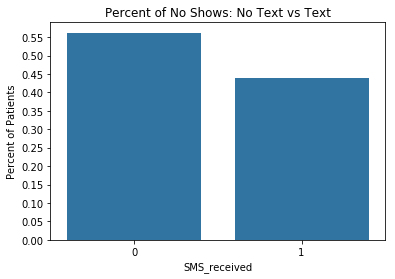

In [13]:
r1 = no_shows.shape[0]
maxr = no_shows['SMS_received'].value_counts().max()
max_prop = maxr / r1
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = no_shows, x = 'SMS_received', color = base_color)
plt.yticks(tick_props * r1, tick_names)
plt.ylabel('Percent of Patients')
plt.title('Percent of No Shows: No Text vs Text');

### Quick Analysis
There is only a 14% difference in no show appointments who received a text against those who did not receive a text. 

### Showed Appointments

In this section, we will take a look at the relationship between those who showed up for their appointments.

In [14]:
#Breaking up no shows in to whether or no they received a text message
show_no_text = showed[showed['SMS_received'] == 0]
show_with_text = showed[showed['SMS_received'] == 1]

#Calculating Lengths of tables
total_no_show_length = len(showed)
show_no_text_length = len(show_no_text)
show_with_text_length = len(show_with_text)

#Calculating Percentages of Tables
show_no_text_percent = round((show_no_text_length / total_no_show_length)*100)
show_with_text_percent = round((show_with_text_length / total_no_show_length)*100)

print('The total number of patients who showed up for their appointment is:', total_no_show_length)
print('The total number of patients who showed up without recieving a text message:', show_no_text_length)
print('The total number of patients who showed up after receiving a text reminder:', show_with_text_length)
print('The percent of patients who showed up without receiving a text:', show_no_text_percent, '%')
print('The percent of patients who showed up after receiving a text reminder', show_with_text_percent, '%')

The total number of patients who showed up for their appointment is: 88208
The total number of patients who showed up without recieving a text message: 62510
The total number of patients who showed up after receiving a text reminder: 25698
The percent of patients who showed up without receiving a text: 71 %
The percent of patients who showed up after receiving a text reminder 29 %


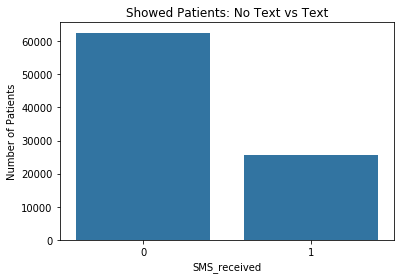

In [15]:
sb.countplot(data = showed, x = 'SMS_received', color = base_color)
plt.ylabel('Number of Patients')
plt.title('Showed Patients: No Text vs Text');

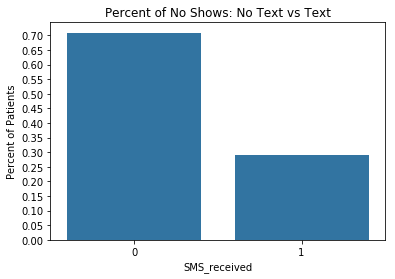

In [16]:
showed_shape = showed.shape[0]
maxr = showed['SMS_received'].value_counts().max()
max_prop = maxr / showed_shape
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = showed, x = 'SMS_received', color = base_color)
plt.yticks(tick_props * showed_shape, tick_names)
plt.ylabel('Percent of Patients')
plt.title('Percent of No Shows: No Text vs Text');

### Brief Analysis
>Overall the number of people who showed without receiving a text message is higher than those who did receive a text message. 
However, it is to believed that the number of people who receive a message since no show count is on avergae lower, it is safe to assume that this number would be much lower if a text was not sent.

### Research Question 2 (Which Age Group Has A Higher No Show Rate)
>The final section will determine the relationship between those who showed and didnt show up for their appointments based on the patients age range. This will help to determine which group has a higher likley hood of being a no show and thus be able to target these groups better if there is a relationship.

In [17]:
#Calculating the total value count for each age group
total_groups = research.groupby(['Groups']).size().rename('count').reset_index()
total_groups

,Groups,count
0,Infant,22139
1,Teenager,6727
2,Young Adult,24137
3,Adult,30019
4,Elder Adult,27504


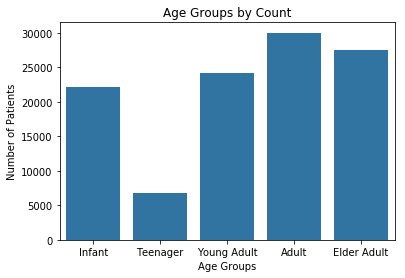

In [18]:
# Graphing the age groups data
sb.countplot(data = research, x = 'Groups', color = base_color)
plt.xlabel('Age Groups')
plt.ylabel('Number of Patients')
plt.title('Age Groups by Count');

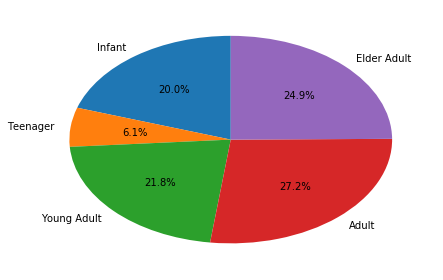

In [19]:
plot = plt.pie(total_groups['count'], labels = total_groups['Groups'], shadow = False, startangle = 90, autopct = '%1.1f%%')
plt.tight_layout()
plt.show()


In the following steps, I'm going to first split the groups into those who did not show for their appointmenr and those who did show for their appointment.

In [20]:
#Seperating those who showed up for their appointment and those wo did not show up for their appointment
showed = research[research['No-show'] == 'No']
no_show = research[research['No-show'] == 'Yes']
showed_length = len(showed)
no_show_length = len(no_show)

Next, I'm going to put each age group into a bucket. I noticed that there is a low number of teenagers compared to the rest, and in order to acheive an accurate analysis, it is more efficient to measure by the total percent of each age group rather than as a whole. This will tell us which percent of each age group has the highest amount of no shows.

I'm first going to analyze the showed age groups

In [21]:
#Splitting each age group into their respective buckets
adults = research[research['Groups'] == 'Adult']
elder_adult= research[research['Groups'] == 'Elder Adult']
young_adult = research[research['Groups'] == 'Young Adult']
infant = research[research['Groups'] == 'Infant']
teenager= research[research['Groups'] == 'Teenager']

#Measuring the length of each group
adult_length = len(adults)
elder_adult_length = len(elder_adult)
young_adult_length = len(young_adult)
infant_length = len(infant)
teenager_length = len(teenager)

Finding the Showed Age Group Data

In [22]:
show_totals = showed.groupby(['Groups']).size().rename('count').reset_index()
show_totals

,Groups,count
0,Infant,17529
1,Teenager,4990
2,Young Adult,18384
3,Adult,24103
4,Elder Adult,23201


In [23]:
#Splitting each age group into it's own data function so that way I can find the actual percent of showed for each age group
showed_adults = showed[showed['Groups'] == 'Adult']
showed_elder_adult= showed[showed['Groups'] == 'Elder Adult']
showed_young_adult = showed[showed['Groups'] == 'Young Adult']
showed_infant = showed[showed['Groups'] == 'Infant']
showed_teenager= showed[showed['Groups'] == 'Teenager']

#Calculating the percent of each age group

showed_adult_percent = len(showed_adults) / adult_length
showed_elder_adult_percent = len(showed_elder_adult) / elder_adult_length
showed_young_adult_percent = len(showed_young_adult) / young_adult_length
showed_infant_percent =len(showed_infant) / infant_length 
showed_teenager_percent = len(showed_teenager) / teenager_length

#Putting each percent into a datafunction
group = [showed_adult_percent, showed_elder_adult_percent, showed_young_adult_percent, showed_infant_percent, showed_teenager_percent  ]


In [24]:
print ('The percent of patients of Infant age who showed up for their appointment', round(showed_infant_percent*100), '%')
print ('The percent of patients of Teenager age who showed up for their appointment', round(showed_teenager_percent*100), '%')
print ('The percent of patients of Young Adult age who showed up for their appointment', round(showed_young_adult_percent*100), '%')
print ('The percent of patients of Adult age who showed up for their appointment', round(showed_adult_percent*100), '%')
print ('The percent of patients of Elder Adult age who showed up for their appointment', round(showed_elder_adult_percent*100), '%')


The percent of patients of Infant age who showed up for their appointment 79 %
The percent of patients of Teenager age who showed up for their appointment 74 %
The percent of patients of Young Adult age who showed up for their appointment 76 %
The percent of patients of Adult age who showed up for their appointment 80 %
The percent of patients of Elder Adult age who showed up for their appointment 84 %


Graphing the data

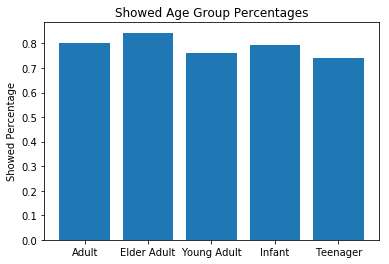

In [25]:
#Creating bin labels
group_names = ('Adult', 'Elder Adult', 'Young Adult', 'Infant', 'Teenager')
y_pos = np.arange(len(group_names))

plt.bar(y_pos, group, align='center')
plt.xticks(y_pos, group_names)
plt.ylabel('Showed Percentage')
plt.title('Showed Age Group Percentages')

plt.show()

### Quick Analysis
It seems that teenagers have the lowest amount of shows based on their total numbers. Elder adults has the highest number of showed appointments.

In [26]:
#Adding the groups into datafunctions
no_show_adults = no_show[no_show['Groups'] == 'Adult']
no_show_elder_adult= no_show[no_show['Groups'] == 'Elder Adult']
no_show_young_adult = no_show[no_show['Groups'] == 'Young Adult']
no_show_infant = no_show[no_show['Groups'] == 'Infant']
no_show_teenager= no_show[no_show['Groups'] == 'Teenager']

#calculating the length
no_show_adult_length = len(no_show_adults)
no_show_elder_adult_length = len(no_show_elder_adult)
no_show_young_adult_length = len(no_show_young_adult)
no_show_infant_length = len(no_show_infant)
no_show_teenager_length = len(no_show_teenager)

#Calcualting the percentages
no_show_adult_percent = no_show_adult_length / adult_length
no_show_elder_adult_percent = no_show_elder_adult_length / elder_adult_length
no_show_young_adult_percent = no_show_young_adult_length / young_adult_length
no_show_infant_percent =no_show_infant_length / infant_length 
no_show_teenager_percent = no_show_teenager_length / teenager_length
no_show_group = [no_show_adult_percent, no_show_elder_adult_percent, no_show_young_adult_percent, no_show_infant_percent, no_show_teenager_percent  ]

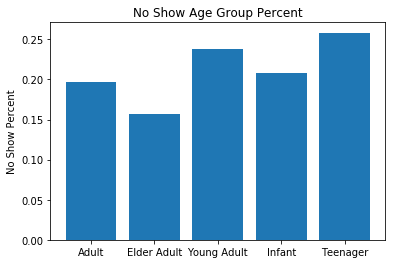

In [27]:
no_show_group_names = ('Adult', 'Elder Adult', 'Young Adult', 'Infant', 'Teenager')
y_pos = np.arange(len(no_show_group_names))
performance = [no_show_adult_percent ,no_show_elder_adult_percent,no_show_young_adult_percent,no_show_infant_percent,no_show_teenager_percent]

plt.bar(y_pos, no_show_group, align='center')
plt.xticks(y_pos, no_show_group_names)
plt.ylabel('No Show Percent')
plt.title('No Show Age Group Percent')

plt.show()

### Quick Analaysis
>Teenagers and young adults have the highest percentage of no shows while elder adults has the least.

### Research Question 3: Which Age Groups Are Most Responsive to Text Messages
>In this section, we're going to analyze the relationship between the age groups and how responsive they are to receieving a text message.

In [28]:
#Breaking up the groups into received text and no text received
received_text = research[research[('SMS_received')] == 1]
no_text = research[research[('SMS_received')] == 0]
print ('Number of people who did not receive a text:', len(no_text))
print ('Number of people who received a text:', len(received_text))


Number of people who did not receive a text: 75045
Number of people who received a text: 35482


Patients who received a text

In [29]:
received_text_groups = received_text.groupby(['Groups']).size().rename('count').reset_index()
received_text_groups

,Groups,count
0,Infant,6526
1,Teenager,1923
2,Young Adult,8301
3,Adult,10015
4,Elder Adult,8717


Patients who did not receive a text

In [30]:
no_text_groups = no_text.groupby(['Groups']).size().rename('count').reset_index()
no_text_groups

,Groups,count
0,Infant,15613
1,Teenager,4804
2,Young Adult,15836
3,Adult,20004
4,Elder Adult,18787


In [31]:
#Splitting up those who did not received a text and were either a no show or a show
no_text_no_show = no_text[no_text['No-show'] == 'Yes']
no_text_show = no_text[no_text['No-show'] == 'No']

#Splitting up those who received a text and were either a no show or a show
text_with_show = received_text[received_text['No-show'] == 'Yes']
text_with_no_show = received_text[received_text['No-show'] == 'No']

Graphing the data for those who received a text and those who did not receive a text

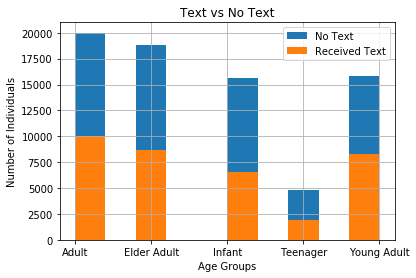

In [32]:
#Number of people who have received a text vs those who haven't graph
no_text['Groups'].hist(label = 'No Text')
received_text['Groups'].hist(label = 'Received Text')
plt.xlabel('Age Groups')
plt.ylabel('Number of Individuals')
plt.title ('Text vs No Text')
plt.legend();

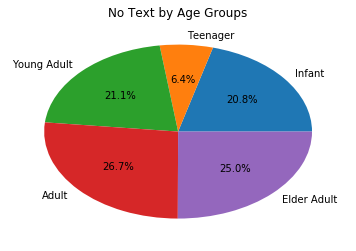

In [33]:
#Plotting the total percentages of each age group that did not receive a text
plt.pie(no_text_groups['count'], labels = no_text_groups['Groups'], autopct = '%1.1f%%')
plt.title('No Text by Age Groups');

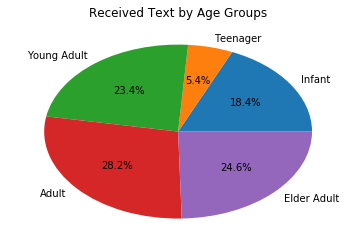

In [34]:
#Plotting the total percentages of each age group that received a text
plt.pie(received_text_groups['count'], labels = received_text_groups['Groups'], autopct = '%1.1f%%')
plt.title('Received Text by Age Groups');

### No Text Received Age Group Analysis
Analayzing the relationship between age groups and their no show status with no text sent.
Showing the numbers of people who did not receive a text message and were either a show or a no show

In [35]:
print('The number of patients who did not receive a text and did not show:', len(no_text_show))
print('The number of patients who did not receive a text and did not show:', len(no_text_no_show))

The number of patients who did not receive a text and did not show: 62510
The number of patients who did not receive a text and did not show: 12535


Number of Patients who did not receive a text and showed up by age group

In [36]:
#No Text With Show
no_text_show.groupby(['Groups']).size().rename('count').reset_index()

,Groups,count
0,Infant,12910
1,Teenager,3743
2,Young Adult,12905
3,Adult,16744
4,Elder Adult,16207


Number of Patients who did not receive a text and did not show up by age group

In [37]:
#No Text No Show
no_text_no_show.groupby(['Groups']).size().rename('count').reset_index()

,Groups,count
0,Infant,2703
1,Teenager,1061
2,Young Adult,2931
3,Adult,3260
4,Elder Adult,2580


Graphing the relationship between those who did not receive a text and whether or not they showed for their appointment

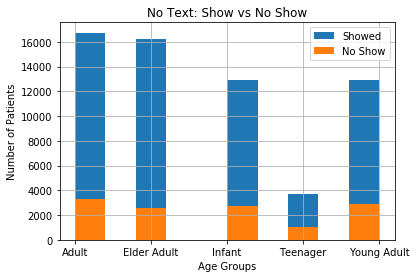

In [38]:
#Graphing the patients who did not receive a text, showed vs no show
no_text_show['Groups'].hist(label = 'Showed')
no_text_no_show['Groups'].hist(label = 'No Show')
plt.legend()
plt.ylabel('Number of Patients')
plt.title('No Text: Show vs No Show')
plt.xlabel('Age Groups');

### Patients Who Received A Text: No Show vs Showed Analysis
Analayzing patients who received a text and whether or not they showed.

In [39]:
#patients who received a text and didnt show.
text_with_no_show.groupby(['Groups']).size().rename('count').reset_index()

,Groups,count
0,Infant,4619
1,Teenager,1247
2,Young Adult,5479
3,Adult,7359
4,Elder Adult,6994


In [40]:
#Patients who received a text and showed
text_with_show.groupby(['Groups']).size().rename('count').reset_index()

,Groups,count
0,Infant,1907
1,Teenager,676
2,Young Adult,2822
3,Adult,2656
4,Elder Adult,1723


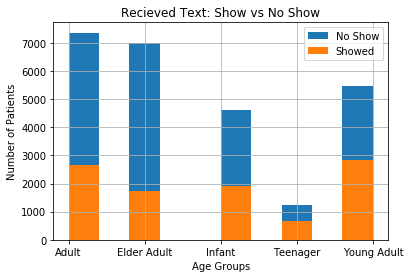

In [41]:
# Patients who received a text: No show vs Showed graph
text_with_no_show['Groups'].hist(label = 'No Show')
text_with_show['Groups'].hist(label = 'Showed')
plt.legend()
plt.ylabel('Number of Patients')
plt.title('Recieved Text: Show vs No Show')
plt.xlabel('Age Groups');

### Quick Analysis
It appears as though teenagers had the greater overall percentage of their total showing up after recieving a text message. 

# TRANSLATE

<a id='conclusions'></a>
## Conclusions
>**Results:** Basesd on the information gathered: <br><br>
>Research Question 1
>
>    1. It is inconclusive whether or not text messages are effective. The number of patients who received a text message and did not show for their appointment is only 14% more than those who did not recieve a text message. 
>    2. There's no concrete evidence that shows the patients who did not recieve a text are more likley to not show for it. The same goes for those who showed for their appointments. 
>    3. While there is a larger number of patients who showed up for their appointments, the number of those who did not receive a text was higher than those who did. This can of course be attributed to the idea that more likley, people are going to show up for their appointments regardless so this number will ultimatley be higher. 

>**Limitations**:
>    1. More data is needed to accuratley conclude whether texting is effective. One way would be to collect additional data at time of check in, see whether or not they showed up for their appointment because of the reminder or not. 
>    2. Measuring what time a text was sent in relation to when their appointment is set would also be beneficial. This would be another factor to measure the effectivness of text messaging.
>    3. Having a lack of detailed information about the text message including their content is a limitaiton as well.


>**Research Question 2**:
>    1. Teenagers and Young adults have the highest amount of no shows and the lowest amount of showed appointments. 
>    2. Elder adults have the highest amount of showed appointments and lowest amount of no shows. 
>    3. It can probably be assumed that elder adults care more about their health than say a young teenager. They also have a greater sense of responsibility. Noticed that infant and adult share a similar number of showed and no show patients. I can see this because infants rely on adults bringing them to their appointments so it would make snese if these numbers are similar. 

>**Limitations**:
>    1.	There are a great number (3539) of people with the age 0. Not sure if place is pediatrics, but results may be skewed if or incorrect wit the age
>    2.	Without access to the person who entered the data, there is uncertantiy over whether or no there are duplicates on file. While it is highly unlikely that a person with the same appointment date has the same age, there is no way to definativley determine if it is the same person since often times there are minor differences in the supposed matches. For example, a patient may match on age, appointment date, and city, but will differ on gender or patient will match all major characteristics, but also have an additional or less indicator for condition. 

>**Research Question 3**: Which Age Groups Are Most Responsive to Text Messages

>    1.The biggest impact to receiving text messaging was in the teenager and young adult sections. These groups had the highest amount of shows based on receiving a text message.
>    2. While inconclusive, it can be said that text messaging works on these specific groups
>    3. Text messaging seems to be least effective for the elder adult category.

>**Limitations**:
>    1. There is no data on the content of the text messages, this would help to dive deeper into the analytics and test which message might be more effective. 
>    2. Some additional questions to ask would be on cell phone usage, to determine if indivduals even use a text per each age group. 
>    3. The data doenst allow for any other means of communication, for instance, phone calls for elderly might be more effective. Also lacking data showing any targeted analytics is detrimental to the study as well.

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Copy2.ipynb'])

0